# Importing dataset and libraries

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [29]:
#Importing the dataset chosen
data = pd.read_csv('glass.data.csv', header=None)
del data[0]
data = data.rename(columns={1: 'Ri',2: 'Na',3: 'Mg',4: 'Al',5: 'Si',6: 'K',7: 'Ca',8: 'Ba',9: 'Fe',10: 'Type'})

In [30]:
data

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Checking data and statistics

In [31]:
#Checking column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ri      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [32]:
#Number of samples per type
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


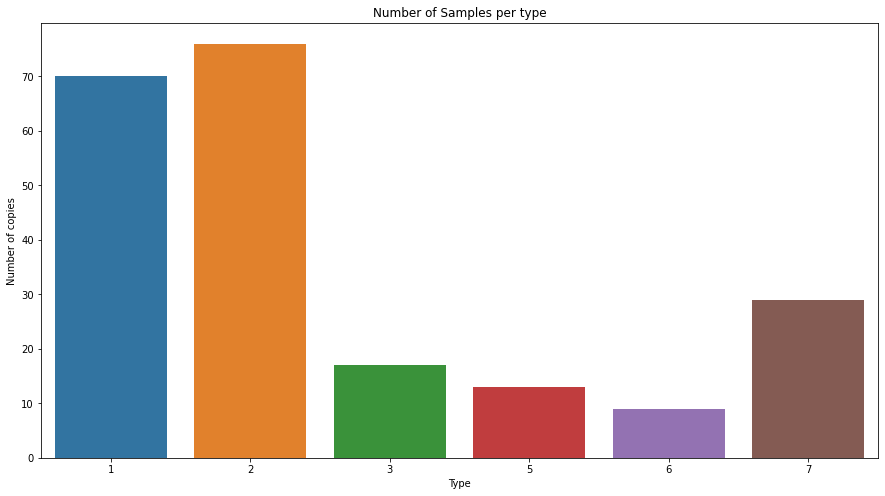

In [40]:
#Copy Distribution Chart
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=data).set_title('Number of Samples per type')
plt.xlabel('Type')
plt.ylabel('Number of copies')
plt.show()   

In [41]:
#Column average
data.describe()

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [45]:
DataCopy = data

In [46]:
data2 = data[data['Type']==6]
data2


,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
176,1.51905,14.00,2.39,1.56,72.37,0.0,9.57,0.0,0.0,6
177,1.51937,13.79,2.41,1.19,72.76,0.0,9.77,0.0,0.0,6
178,1.51829,14.46,2.24,1.62,72.38,0.0,9.26,0.0,0.0,6
179,1.51852,14.09,2.19,1.66,72.67,0.0,9.32,0.0,0.0,6
180,1.51299,14.40,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6
181,1.51888,14.99,0.78,1.74,72.50,0.0,9.95,0.0,0.0,6
182,1.51916,14.15,0.00,2.09,72.74,0.0,10.88,0.0,0.0,6
183,1.51969,14.56,0.00,0.56,73.48,0.0,11.22,0.0,0.0,6
184,1.51115,17.38,0.00,0.34,75.41,0.0,6.65,0.0,0.0,6


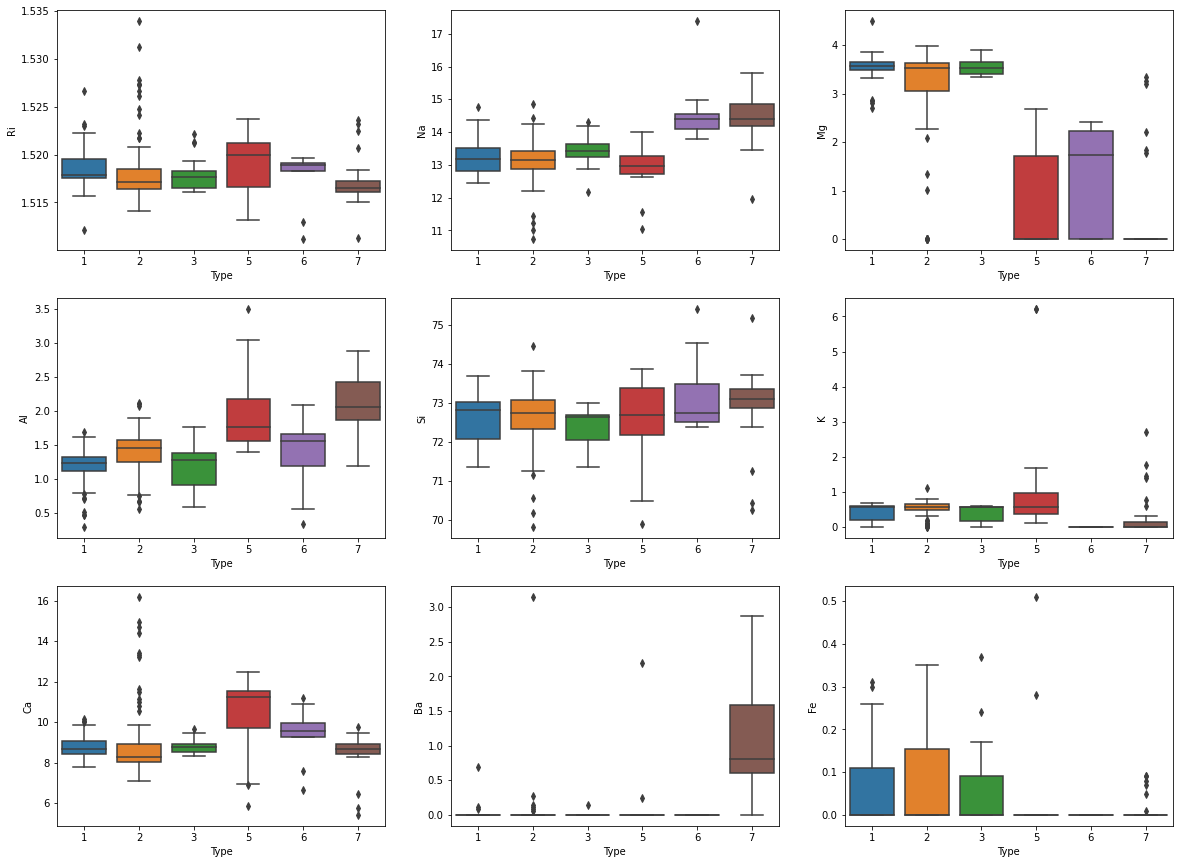

In [47]:
#Outliers Check
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='Ri', data=data)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=data)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=data)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=data)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=data)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=data)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=data)
plt.show()

In [48]:
#Average columns by Type
datamedia =data.groupby('Type',as_index=False).mean()
datamedia

,Type,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


In [49]:
#Standard deviation by type
datadp = data.groupby('Type',as_index=False).std()
datadp

,Type,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,0.002268,0.499301,0.247043,0.273158,0.569484,0.214879,0.574807,0.083838,0.089075
1,2,0.003802,0.664159,1.215661,0.318340,0.724573,0.213726,1.921635,0.362340,0.106433
2,3,0.001916,0.506887,0.162786,0.347489,0.512276,0.229890,0.380111,0.036380,0.107864
3,5,0.003345,0.777037,0.999146,0.693920,1.282319,2.138695,2.183791,0.608251,0.155588
4,6,0.003116,1.084020,1.097134,0.571861,1.079467,0.000000,1.449948,0.000000,0.000000
5,7,0.002545,0.686359,1.117683,0.442726,0.940234,0.668493,0.973505,0.665341,0.029794


In [50]:
#Cleaning Outliers
colunas = ['Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe']
for n in range(1,8):
  if n == 4:
    pass
  else:
    for coluna in colunas:
      data1 = data[data['Type']==n]
      dif = data1[f'{coluna}'].quantile(0.75) - data1[f'{coluna}'].quantile(0.25)
      remove = data1[data1[f'{coluna}'] > (data1[f'{coluna}'].quantile(0.75) + dif * 1.5)]
      data_pruned = data.drop(remove.index)
data_pruned

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


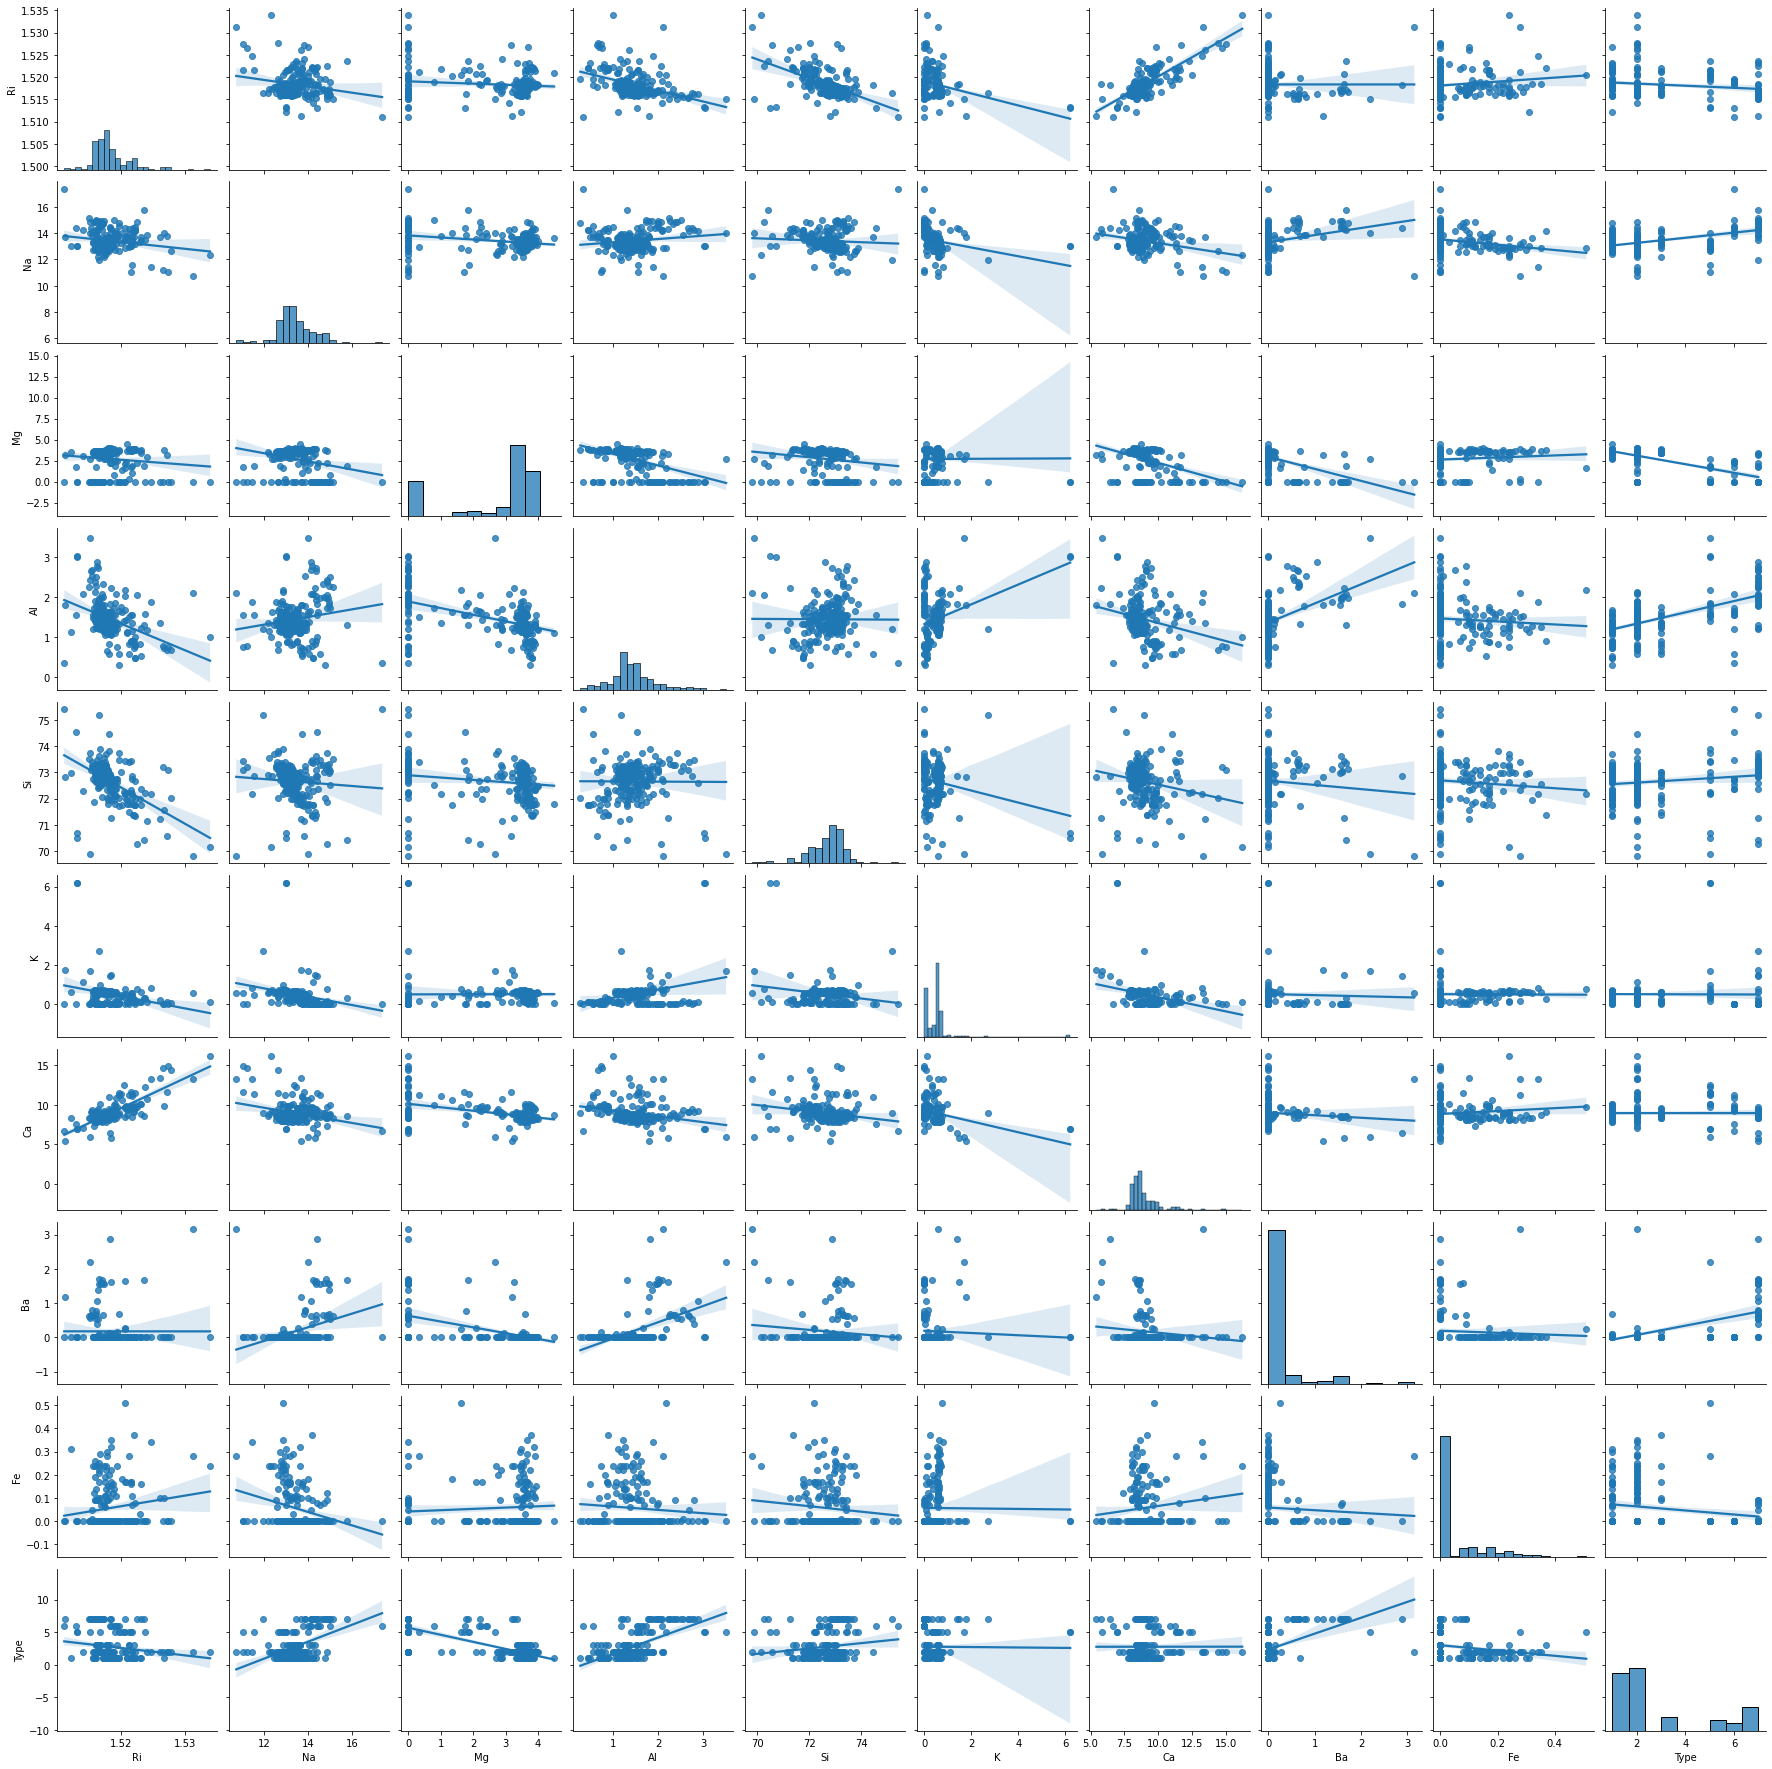

In [51]:
#Pairplot to find linear relationshipssns.
pairplot(data=data, kind = 'reg')

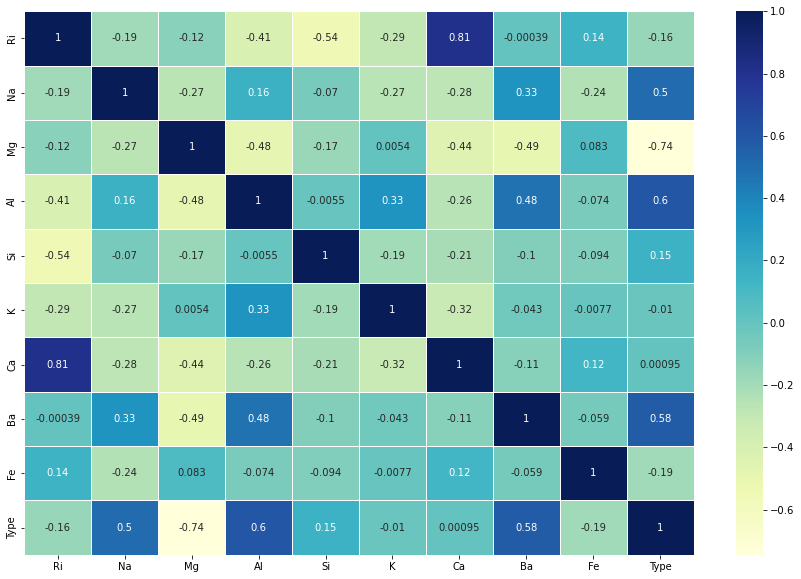

In [52]:
#Pairplot heatmap
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=0.5)
plt.show()

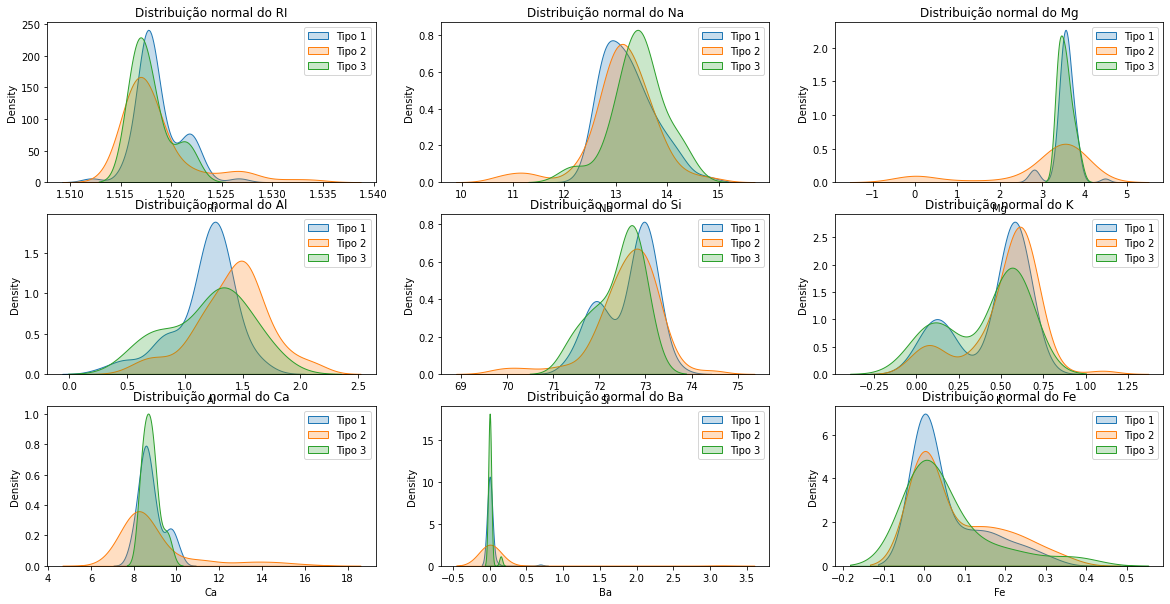

In [53]:
#Normal distribution of types 1,2 and 3
plt.subplots(figsize = (20,10))
plt.subplot(3,3,1)
sns.kdeplot(data["Ri"][data.Type == 1], shade = True)
sns.kdeplot(data["Ri"][data.Type == 2], shade = True)
sns.kdeplot(data["Ri"][data.Type == 3], shade = True)
plt.title("Distribuição normal do RI")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,2)
sns.kdeplot(data["Na"][data.Type == 1], shade = True)
sns.kdeplot(data["Na"][data.Type == 2], shade = True)
sns.kdeplot(data["Na"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Na")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,3)
sns.kdeplot(data["Mg"][data.Type == 1], shade = True)
sns.kdeplot(data["Mg"][data.Type == 2], shade = True)
sns.kdeplot(data["Mg"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Mg")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,4)
sns.kdeplot(data["Al"][data.Type == 1], shade = True)
sns.kdeplot(data["Al"][data.Type == 2], shade = True)
sns.kdeplot(data["Al"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Al")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,5)
sns.kdeplot(data["Si"][data.Type == 1], shade = True)
sns.kdeplot(data["Si"][data.Type == 2], shade = True)
sns.kdeplot(data["Si"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Si")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,6)
sns.kdeplot(data["K"][data.Type == 1], shade = True)
sns.kdeplot(data["K"][data.Type == 2], shade = True)
sns.kdeplot(data["K"][data.Type == 3], shade = True)
plt.title("Distribuição normal do K")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,7)
sns.kdeplot(data["Ca"][data.Type == 1], shade = True)
sns.kdeplot(data["Ca"][data.Type == 2], shade = True)
sns.kdeplot(data["Ca"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Ca")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,8)
sns.kdeplot(data["Ba"][data.Type == 1], shade = True)
sns.kdeplot(data["Ba"][data.Type == 2], shade = True)
sns.kdeplot(data["Ba"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Ba")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])
plt.subplot(3,3,9)
sns.kdeplot(data["Fe"][data.Type == 1], shade = True)
sns.kdeplot(data["Fe"][data.Type == 2], shade = True)
sns.kdeplot(data["Fe"][data.Type == 3], shade = True)
plt.title("Distribuição normal do Fe")
plt.legend(['Tipo 1', 'Tipo 2', 'Tipo 3'])

# KNN Algorithm

In [54]:
classes = data.pop('Type')
classes

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [55]:
data

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [56]:
list = []
for z in range(0,10000):
  data_train, data_test, classes_train, classes_test = train_test_split(data, classes, test_size = 0.2, random_state = z,stratify= classes)
  list1= []
  for a in range(1,16,2):
    model = KNeighborsClassifier(n_neighbors= a )
    model.fit(data_train, classes_train)
    score = round(model.score(data_test, classes_test)*100,2)
    list1.append(score)
  list.append(list1)

print(list.index(max(list)))
print(max(list).index(max(max(list)))+1)


9917
1


In [57]:
list3= []
for z in range(0,1000):
  data_train, data_test, classes_train, classes_test = train_test_split(data, classes, test_size = 0.2, random_state = z,stratify= classes)
  list1= []
  for a in range(1,16,2):
    model = KNeighborsClassifier(n_neighbors= a )
    model.fit(data_train, classes_train)
    score = round(model.score(data_test, classes_test)*100,2)
    list3.append(round(score,1))

In [58]:
dflist3 = pd.DataFrame(list3)
     

In [59]:
dflist3.mean()

0    65.573887
dtype: float64

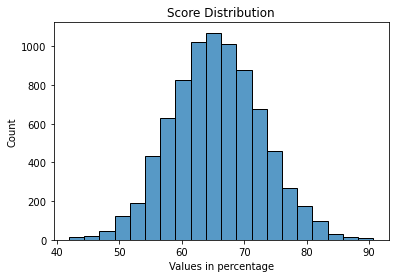

In [61]:
list3.sort()
sns.histplot(data=list3,bins=20)
plt.title('Score Distribution')
plt.xlabel('Values in percentage')
plt.show()

In [62]:
data_train, data_test, classes_train, classes_test = train_test_split(data, classes, test_size = 0.2, random_state = 9917, stratify = classes)    

In [63]:
model = KNeighborsClassifier(n_neighbors= 1)
model.fit(data_train, classes_train)
print(f'{model.score(data_test, classes_test)*100}%')

93.02325581395348%


In [64]:
model = KNeighborsClassifier(n_neighbors=1)
train = model.fit(data_train, classes_train)
test = model.score(data_test, classes_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


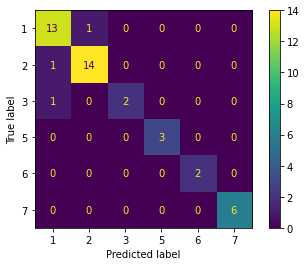

In [65]:
cm = confusion_matrix(classes_test, model.predict(data_test))
plot_confusion_matrix(model, data_test, classes_test)
plt.show()

In [66]:
predicted = model.predict(data_test)
print(classification_report(classes_test,predicted))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.93      0.93      0.93        15
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.93        43
   macro avg       0.97      0.92      0.94        43
weighted avg       0.93      0.93      0.93        43

